# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
import pandas as pd

In [8]:
df1 = pd.read_csv('BA_reviews.csv')

In [9]:
df1

,Unnamed: 0,reviews
0,0,Not Verified | Top Ten REASONS to not use Brit...
1,1,Not Verified | Easy check in on the way to He...
2,2,✅ Trip Verified | Online check in worked fine...
3,3,✅ Trip Verified |. The BA first lounge at Term...
4,4,Not Verified | Paid a quick visit to Nice yest...
...,...,...
995,995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,996,✅ Trip Verified | London to Hamburg. Baggage ...
997,997,✅ Trip Verified | Flew London Heathrow to Hong...
998,998,✅ Trip Verified | Flew to Istanbul with Britis...


In [15]:
data = df1.drop('Unnamed: 0',axis = 1)
data

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...
...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,✅ Trip Verified | London to Hamburg. Baggage ...
997,✅ Trip Verified | Flew London Heathrow to Hong...
998,✅ Trip Verified | Flew to Istanbul with Britis...


In [18]:
data[['verified','review']]= data['reviews'].str.split('|', 1, expand=True)
data

,reviews,verified,review
0,Not Verified | Top Ten REASONS to not use Brit...,Not Verified,Top Ten REASONS to not use British Airways To...
1,Not Verified | Easy check in on the way to He...,Not Verified,Easy check in on the way to Heathrow. The fl...
2,✅ Trip Verified | Online check in worked fine...,✅ Trip Verified,Online check in worked fine. Quick security ...
3,✅ Trip Verified |. The BA first lounge at Term...,✅ Trip Verified,. The BA first lounge at Terminal 5 was a zoo...
4,Not Verified | Paid a quick visit to Nice yest...,Not Verified,Paid a quick visit to Nice yesterday from Hea...
...,...,...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...,✅ Trip Verified,Aberdeen to Boston via London Heathrow. I fo...
996,✅ Trip Verified | London to Hamburg. Baggage ...,✅ Trip Verified,London to Hamburg. Baggage self-check-in was...
997,✅ Trip Verified | Flew London Heathrow to Hong...,✅ Trip Verified,Flew London Heathrow to Hong Kong with Britis...
998,✅ Trip Verified | Flew to Istanbul with Britis...,✅ Trip Verified,Flew to Istanbul with British Airways on 5th ...


In [26]:
import pandas as pd

df1 = pd.read_csv('BA_reviews.csv')

# Remove unnecessary column
df1.drop('Unnamed: 0', axis=1, inplace=True)

# Clean the reviews column
df1['reviews'] = df1['reviews'].str.replace('✅ Trip Verified', 'Trip Verified').str.strip()
df1['reviews'] = df1['reviews'].str.replace('❎ Not Verified', 'Not Verified').str.strip()
# Split the reviews into 'verified' and 'review' columns
df1[['verified', 'review']] = df1['reviews'].str.split('|', 1, expand=True)

df1.head()

,reviews,verified,review
0,Not Verified | Top Ten REASONS to not use Brit...,Not Verified,Top Ten REASONS to not use British Airways To...
1,Not Verified | Easy check in on the way to He...,Not Verified,Easy check in on the way to Heathrow. The fl...
2,Trip Verified | Online check in worked fine. ...,Trip Verified,Online check in worked fine. Quick security ...
3,Trip Verified |. The BA first lounge at Termin...,Trip Verified,. The BA first lounge at Terminal 5 was a zoo...
4,Not Verified | Paid a quick visit to Nice yest...,Not Verified,Paid a quick visit to Nice yesterday from Hea...


In [27]:
df1.isnull().sum()

reviews     0
verified    0
review      0
dtype: int64

In [28]:
df1['verified'].value_counts()

Trip Verified     809
Not Verified      191
Name: verified, dtype: int64

In [29]:
data_col_done = df1.drop('reviews',axis =1)
data_col_done

,verified,review
0,Not Verified,Top Ten REASONS to not use British Airways To...
1,Not Verified,Easy check in on the way to Heathrow. The fl...
2,Trip Verified,Online check in worked fine. Quick security ...
3,Trip Verified,. The BA first lounge at Terminal 5 was a zoo...
4,Not Verified,Paid a quick visit to Nice yesterday from Hea...
...,...,...
995,Trip Verified,Aberdeen to Boston via London Heathrow. I fo...
996,Trip Verified,London to Hamburg. Baggage self-check-in was...
997,Trip Verified,Flew London Heathrow to Hong Kong with Britis...
998,Trip Verified,Flew to Istanbul with British Airways on 5th ...


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Tokenize the reviews
data['tokenized_reviews'] = data['review'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
data['filtered_reviews'] = data['tokenized_reviews'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Perform sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['review'].apply(lambda review: sid.polarity_scores(review)['compound'])

data.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...


,reviews,verified,review,tokenized_reviews,filtered_reviews,sentiment_scores
0,Not Verified | Top Ten REASONS to not use Brit...,Not Verified,Top Ten REASONS to not use British Airways To...,"[Top, Ten, REASONS, to, not, use, British, Air...","[Top, Ten, REASONS, use, British, Airways, :, ...",-0.9296
1,Not Verified | Easy check in on the way to He...,Not Verified,Easy check in on the way to Heathrow. The fl...,"[Easy, check, in, on, the, way, to, Heathrow, ...","[Easy, check, way, Heathrow, ., flight, time, ...",-0.0516
2,✅ Trip Verified | Online check in worked fine...,✅ Trip Verified,Online check in worked fine. Quick security ...,"[Online, check, in, worked, fine, ., Quick, se...","[Online, check, worked, fine, ., Quick, securi...",0.8479
3,✅ Trip Verified |. The BA first lounge at Term...,✅ Trip Verified,. The BA first lounge at Terminal 5 was a zoo...,"[., The, BA, first, lounge, at, Terminal, 5, w...","[., BA, first, lounge, Terminal, 5, zoo, 2pm, ...",-0.1289
4,Not Verified | Paid a quick visit to Nice yest...,Not Verified,Paid a quick visit to Nice yesterday from Hea...,"[Paid, a, quick, visit, to, Nice, yesterday, f...","[Paid, quick, visit, Nice, yesterday, Heathrow...",0.9763


In [31]:
# Check the number of reviews
num_reviews = len(data)
print("Number of reviews:", num_reviews)

# Check the distribution of review lengths
data['review_length'] = data['review'].str.len()
data['review_length'].describe()

# Calculate basic statistics of the sentiment scores
data['sentiment_scores'].describe()

Number of reviews: 1000


count    1000.000000
mean        0.085157
std         0.787129
min        -0.997400
25%        -0.773375
50%         0.226300
75%         0.919550
max         0.999200
Name: sentiment_scores, dtype: float64

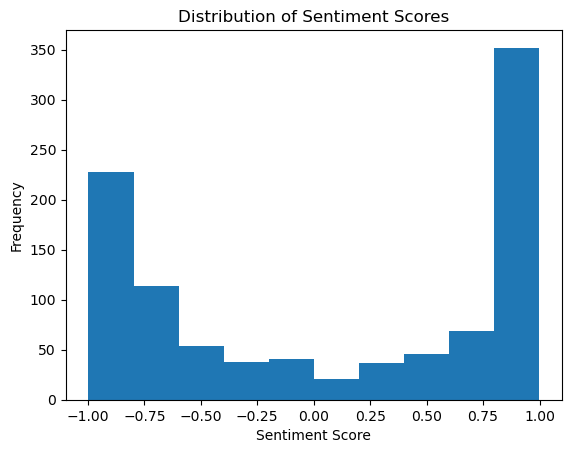

verified
Not Verified        0.068700
✅ Trip Verified     0.090526
❎ Not Verified     -0.531300
Name: sentiment_scores, dtype: float64


In [32]:
import matplotlib.pyplot as plt

# Visualize the distribution of sentiment scores
data['sentiment_scores'].plot.hist()
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Explore the sentiment distribution based on the 'verified' column
sentiment_by_verified = data.groupby('verified')['sentiment_scores'].mean()
print(sentiment_by_verified)


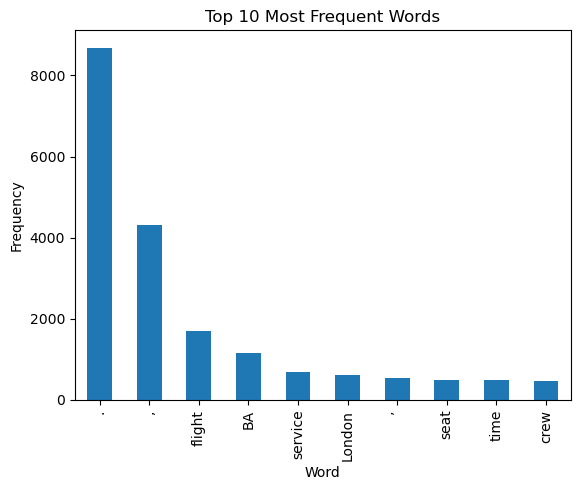

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the frequency of words in the reviews
word_frequency = data['filtered_reviews'].apply(pd.Series).stack().value_counts()

# Visualize the top N most frequent words using a bar plot
N = 10
top_words = word_frequency.head(N)
top_words.plot.bar()
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(N))
plt.show()


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text preprocessing and vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review'])

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Get the most important words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print("Topic {}: {}".format(topic_idx, ', '.join(top_words)))

Topic 0: flight, good, time, lounge, seat, crew, food, boarding, service, cabin
Topic 1: flight, ba, london, british, airways, customer, service, hours, told, cancelled
Topic 2: flight, staff, check, crew, seat, cabin, ba, bag, london, heathrow
Topic 3: flight, ba, service, food, good, crew, seat, class, seats, cabin
Topic 4: luggage, flight, staff, told, ba, seat, airport, london, hours, airline


In [41]:
topic_idx

4

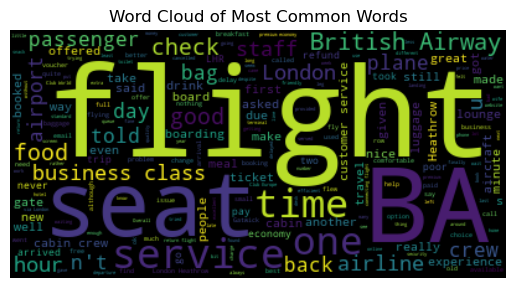

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud to visualize the most common words in the reviews
wordcloud = WordCloud().generate(' '.join(data['filtered_reviews'].apply(' '.join)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


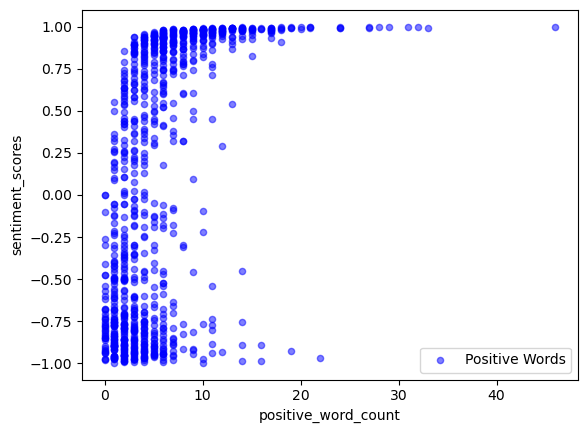

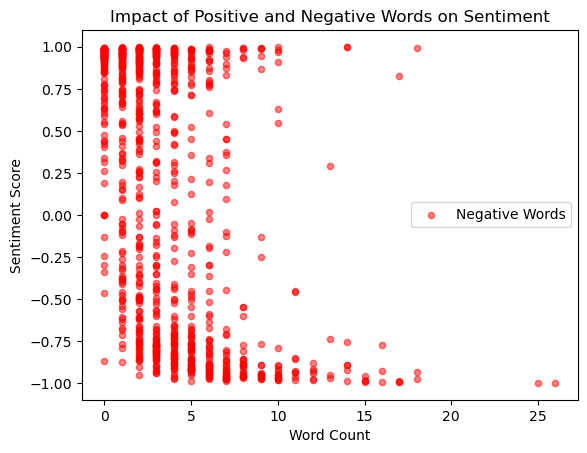

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for individual words
data['word_sentiment_scores'] = data['filtered_reviews'].apply(lambda words: [sid.polarity_scores(word)['compound'] for word in words])

# Analyze the impact of positive and negative words on overall sentiment
data['positive_word_count'] = data['word_sentiment_scores'].apply(lambda scores: sum(score > 0 for score in scores))
data['negative_word_count'] = data['word_sentiment_scores'].apply(lambda scores: sum(score < 0 for score in scores))

# Visualize the impact of positive and negative words
data.plot.scatter(x='positive_word_count', y='sentiment_scores', c='blue', alpha=0.5, label='Positive Words')
data.plot.scatter(x='negative_word_count', y='sentiment_scores', c='red', alpha=0.5, label='Negative Words')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.title('Impact of Positive and Negative Words on Sentiment')
plt.legend()
plt.show()


In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text preprocessing and vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review'])

# Apply Latent Dirichlet Allocation (LDA)
n_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the most important words for each topic
feature_names = vectorizer.get_feature_names()
topics = []
top_words = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_topic = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append("Topic {}".format(topic_idx))
    top_words.append(', '.join(top_words_topic))

# Create a DataFrame with topics and top words
df_topics = pd.DataFrame({'Topic': topics, 'Top Words': top_words})

# Display the DataFrame
print(df_topics)


     Topic                                          Top Words
0  Topic 0  flight, good, time, lounge, seat, crew, food, ...
1  Topic 1  flight, ba, london, british, airways, customer...
2  Topic 2  flight, staff, check, crew, seat, cabin, ba, b...
3  Topic 3  flight, ba, service, food, good, crew, seat, c...
4  Topic 4  luggage, flight, staff, told, ba, seat, airpor...


In [46]:
data.head(5)

,reviews,verified,review,tokenized_reviews,filtered_reviews,sentiment_scores,review_length,word_sentiment_scores,positive_word_count,negative_word_count,review_sentiment
0,Not Verified | Top Ten REASONS to not use Brit...,Not Verified,Top Ten REASONS to not use British Airways To...,"[Top, Ten, REASONS, to, not, use, British, Air...","[Top, Ten, REASONS, use, British, Airways, :, ...",-0.9296,2286,"[0.2023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",19,11,-0.9296
1,Not Verified | Easy check in on the way to He...,Not Verified,Easy check in on the way to Heathrow. The fl...,"[Easy, check, in, on, the, way, to, Heathrow, ...","[Easy, check, way, Heathrow, ., flight, time, ...",-0.0516,519,"[0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",2,1,-0.0516
2,✅ Trip Verified | Online check in worked fine...,✅ Trip Verified,Online check in worked fine. Quick security ...,"[Online, check, in, worked, fine, ., Quick, se...","[Online, check, worked, fine, ., Quick, securi...",0.8479,172,"[0.0, 0.0, 0.0, 0.2023, 0.0, 0.0, 0.34, 0.0, 0...",4,0,0.8479
3,✅ Trip Verified |. The BA first lounge at Term...,✅ Trip Verified,. The BA first lounge at Terminal 5 was a zoo...,"[., The, BA, first, lounge, at, Terminal, 5, w...","[., BA, first, lounge, Terminal, 5, zoo, 2pm, ...",-0.1289,906,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,9,-0.1289
4,Not Verified | Paid a quick visit to Nice yest...,Not Verified,Paid a quick visit to Nice yesterday from Hea...,"[Paid, a, quick, visit, to, Nice, yesterday, f...","[Paid, quick, visit, Nice, yesterday, Heathrow...",0.9763,1351,"[0.0, 0.0, 0.0, 0.4215, 0.0, 0.0, 0.0, 0.0, 0....",10,4,0.9763
